# **Table of contents**
### 1) Loading the dataset
### 2) Preprocessing the Products data
### 3) Preprocessing the reviews data
### 4) Merging the data
### 5) Preprocessing the review column
### 6) Preprocessing the ingredients column
### 7) saving the data after preprocessing as csv file
### 8) Visualizations*
### 9) Label Encoding

# Import the needed libraries

In [1]:
# !pip install contractions

# Imports

In [ ]:
import pandas as pd
import numpy as np 

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# **1) Loading the datasets**
# Loading the Products dataset

In [3]:
products = pd.read_csv('Recommendation System\sephora_reviews\product_info.csv')
products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [4]:
products.shape

(8494, 27)

# Loading the reviews data set

In [5]:
# Loading in reviews data
df1 = pd.read_csv(r"Recommendation System\sephora_reviews\reviews_0-250.csv")
df2 = pd.read_csv(r"Recommendation System\sephora_reviews\reviews_250-500.csv")
df3 = pd.read_csv(r"Recommendation System\sephora_reviews\reviews_500-750.csv")
df4 = pd.read_csv(r"Recommendation System\sephora_reviews\reviews_750-1250.csv")
df5 = pd.read_csv(r"Recommendation System\sephora_reviews\reviews_1250-end.csv")

# Combining the dfs
reviews = pd.concat([df1,df2,df3,df4,df5])

reviews.info()

C:\Users\saba2\AppData\Local\Temp\ipykernel_776\2410055223.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"Recommendation System\sephora_reviews\reviews_0-250.csv")
C:\Users\saba2\AppData\Local\Temp\ipykernel_776\2410055223.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(r"Recommendation System\sephora_reviews\reviews_750-1250.csv")
C:\Users\saba2\AppData\Local\Temp\ipykernel_776\2410055223.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv(r"Recommendation System\sephora_reviews\reviews_1250-end.csv")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982

In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

# **2) Preprocessing the Products data**

# I will select only the columns that I need from the products dataset

In [7]:
products_new = pd.DataFrame(products, columns=['product_id','product_name','ingredients','highlights','primary_category','secondary_category'])
products_new.head(5)
products_new.shape

(8494, 6)

# Now I will filter the products that are related to my scope

In [8]:
products_new['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men', 'Gifts'], dtype=object)

In [9]:
products_new['secondary_category'].unique()

array(['Value & Gift Sets', 'Women', 'Body Moisturizers', 'Fragrance',
       'Men', 'Candles & Home Scents', 'Body Care',
       'Hair Styling & Treatments', 'Shampoo & Conditioner', 'Mini Size',
       'Lip', 'Moisturizers', 'Treatments', 'Eye Care',
       'Lip Balms & Treatments', 'Sunscreen', 'Cleansers', 'Masks',
       'Skincare', 'Face', 'Eye', 'Cheek', 'Hair', 'Tools',
       'Brushes & Applicators', 'Makeup Palettes', 'Beauty Tools',
       'Accessories', 'Makeup', 'Bath & Shower', 'Wellness',
       'High Tech Tools', 'Shop by Concern', nan, 'Self Tanners',
       'Shaving', 'Hair Tools', 'Nail', 'Beauty Accessories',
       'Beauty Supplements', 'Other Needs', 'Bath & Body'], dtype=object)

In [ ]:
# Defining  the categories that are related to the skincare, makeup, Bath & Body, fragrance, and Hair
categories_to_include = ['Skincare', 'Makeup', 'Bath & Body', 'Fragrance', 'Hair']

# Filtering the products DataFrame to include only the relevant categories
filtered_products = products_new[products_new['primary_category'].isin(categories_to_include)]

# Checking the shape and unique values in the new DataFrame
print(filtered_products.shape)
print(filtered_products['primary_category'].unique())


(8090, 6)
['Fragrance' 'Bath & Body' 'Hair' 'Makeup' 'Skincare']


In [11]:
filtered_products['secondary_category'].unique()

array(['Value & Gift Sets', 'Women', 'Body Moisturizers', 'Men',
       'Candles & Home Scents', 'Body Care', 'Hair Styling & Treatments',
       'Shampoo & Conditioner', 'Mini Size', 'Lip', 'Moisturizers',
       'Treatments', 'Eye Care', 'Lip Balms & Treatments', 'Sunscreen',
       'Cleansers', 'Masks', 'Face', 'Eye', 'Cheek', 'Tools',
       'Brushes & Applicators', 'Makeup Palettes', 'Accessories',
       'Bath & Shower', 'Wellness', 'High Tech Tools', 'Shop by Concern',
       nan, 'Self Tanners', 'Nail', 'Beauty Supplements'], dtype=object)

In [12]:
products_new['secondary_category'].unique()

array(['Value & Gift Sets', 'Women', 'Body Moisturizers', 'Fragrance',
       'Men', 'Candles & Home Scents', 'Body Care',
       'Hair Styling & Treatments', 'Shampoo & Conditioner', 'Mini Size',
       'Lip', 'Moisturizers', 'Treatments', 'Eye Care',
       'Lip Balms & Treatments', 'Sunscreen', 'Cleansers', 'Masks',
       'Skincare', 'Face', 'Eye', 'Cheek', 'Hair', 'Tools',
       'Brushes & Applicators', 'Makeup Palettes', 'Beauty Tools',
       'Accessories', 'Makeup', 'Bath & Shower', 'Wellness',
       'High Tech Tools', 'Shop by Concern', nan, 'Self Tanners',
       'Shaving', 'Hair Tools', 'Nail', 'Beauty Accessories',
       'Beauty Supplements', 'Other Needs', 'Bath & Body'], dtype=object)

#### **I want to know the unique values of the "secondary_category" where the  value of the "primary_category" is "Fragrance"**

#### Removing the unwanted categories under the "Fragrance" category

In [ ]:
# Filtering the DataFrame where primary_category is "Fragrance"
fragrance_products = filtered_products[filtered_products['primary_category'] == 'Fragrance']

# Getting unique values of the secondary_category column
unique_secondary_categories = fragrance_products['secondary_category'].unique()

# Displaying the result
print(unique_secondary_categories)


['Value & Gift Sets' 'Women' 'Men' 'Candles & Home Scents' 'Mini Size' nan]


In [ ]:
# Defining the categories to keep
categories_to_keep = ["Fragrance", "Bath & Body", "Hair", "Makeup", "Skincare"]

# Applying the filtering conditions
test = filtered_products[
    (
        (filtered_products["primary_category"] == "Fragrance") &
        (filtered_products["secondary_category"].isin(["Women", "Men"]))
    ) |
    (filtered_products["primary_category"].isin(categories_to_keep) & 
     (filtered_products["primary_category"] != "Fragrance"))
]

# Displaying the filtered DataFrame
test


,product_id,product_name,ingredients,highlights,primary_category,secondary_category
1,P473668,La Habana Eau de Parfum,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
2,P473662,Rainbow Bar Eau de Parfum,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
3,P473660,Kasbah Eau de Parfum,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
4,P473658,Purple Haze Eau de Parfum,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
5,P473661,Kasbah Eau de Parfum Travel Spray,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women
...,...,...,...,...,...,...
8485,P306857,L’Homme Deodorant,NaN,NaN,Bath & Body,Body Care
8486,P457262,Y Eau Fraiche,"['Alcohol, Parfum / Fragrance, Aqua / Water, L...","['Fresh Scent', 'Layerable Scent']",Fragrance,Men
8489,P467659,Couture Clutch Eyeshadow Palette,"['Talc, Synthetic Fluorphlogopite, Triethylhex...",NaN,Makeup,Eye
8490,P500874,L'Homme Eau de Parfum,"['Alcohol, Aqua / Water / Eau, Parfum / Fragra...","['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men


In [15]:
test['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Hair', 'Makeup', 'Skincare'],
      dtype=object)

In [16]:
test['secondary_category'].unique()

array(['Women', 'Body Moisturizers', 'Value & Gift Sets', 'Men',
       'Body Care', 'Hair Styling & Treatments', 'Shampoo & Conditioner',
       'Mini Size', 'Lip', 'Moisturizers', 'Treatments', 'Eye Care',
       'Lip Balms & Treatments', 'Sunscreen', 'Cleansers', 'Masks',
       'Face', 'Eye', 'Cheek', 'Tools', 'Brushes & Applicators',
       'Makeup Palettes', 'Accessories', 'Bath & Shower', 'Wellness',
       'High Tech Tools', 'Shop by Concern', 'Self Tanners', 'Nail',
       'Beauty Supplements', 'Candles & Home Scents'], dtype=object)

#### Here I want to check that the secondary category of the "Fragrance" is only "Men" and "women"

In [ ]:
# Filtering the DataFrame where primary_category is "Fragrance"
fragrance_products_test = test[test['primary_category'] == 'Fragrance']

# Getting unique values of the secondary_category column
unique_secondary_categories_test = fragrance_products_test['secondary_category'].unique()

# Displaying the result
print(unique_secondary_categories_test)


['Women' 'Men']


In [18]:
final_products = test.copy()
final_products.head()

,product_id,product_name,ingredients,highlights,primary_category,secondary_category
1,P473668,La Habana Eau de Parfum,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
2,P473662,Rainbow Bar Eau de Parfum,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
3,P473660,Kasbah Eau de Parfum,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
4,P473658,Purple Haze Eau de Parfum,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
5,P473661,Kasbah Eau de Parfum Travel Spray,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women


In [19]:
final_products.shape

(7668, 6)

### **I will drop the products whose secondary category is out of my scope**

In [ ]:
# Defining the categories to drop
categories_to_drop = [
    "Value & Gift Sets", "Brushes & Applicators", "Tools",
    "Accessories", "High Tech Tools", "Candles & Home Scents"
]

# Droping rows with specified secondary_category values
final_products = final_products[~final_products["secondary_category"].isin(categories_to_drop)]


In [ ]:
# Displaying the resulting DataFrame
final_products['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Hair', 'Makeup', 'Skincare'],
      dtype=object)

In [22]:
final_products['secondary_category'].unique()

array(['Women', 'Body Moisturizers', 'Men', 'Body Care',
       'Hair Styling & Treatments', 'Shampoo & Conditioner', 'Mini Size',
       'Lip', 'Moisturizers', 'Treatments', 'Eye Care',
       'Lip Balms & Treatments', 'Sunscreen', 'Cleansers', 'Masks',
       'Face', 'Eye', 'Cheek', 'Makeup Palettes', 'Bath & Shower',
       'Wellness', 'Shop by Concern', 'Self Tanners', 'Nail',
       'Beauty Supplements'], dtype=object)

## The discreption of some categories
#### **Mini Size:** This category typically includes smaller or travel-sized versions of products. These are often marketed as "trial sizes," convenient for traveling, or for customers who want to test a product without committing to a full-size purchase.

#### **Shop by Concern:** This category groups products based on specific skincare or beauty concerns, rather than traditional categories like skincare or makeup. For example, it might include products addressing concerns like acne, aging, dryness, or uneven skin tone.

#### **Self Tanners:** Refers to products designed to give the skin a tanned appearance without the need for sun exposure. These products are typically used to achieve a bronzed, sun-kissed look without the harmful effects of UV rays.


In [23]:
final_products.shape

(6823, 6)

### checking the null values

In [24]:
final_products.isna().sum()

product_id               0
product_name             0
ingredients            269
highlights            1598
primary_category         0
secondary_category       0
dtype: int64

In [25]:
final_products.shape

(6823, 6)

# Dropping the null values

In [28]:
final_products=final_products.dropna()

In [29]:
final_products.isna().sum()

product_id            0
product_name          0
ingredients           0
highlights            0
primary_category      0
secondary_category    0
dtype: int64

In [30]:
final_products.shape

(5078, 6)

# **3) Preprocessing the reviews data**

In [31]:
reviews.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [32]:
reviews.isna().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [33]:
reviews.shape

(1094411, 19)

#### **Now I want to filter the reviews data frame to carry only the products in the "final_products" data frame, I will do this using the "product_id" column**

In [ ]:
# Filtering the 'reviews' dataframe to include only products that are in 'final_products'
filtered_reviews = reviews[reviews['product_id'].isin(final_products['product_id'])]

# Showing the filtered reviews dataframe
filtered_reviews.shape


(953109, 19)

In [35]:
filtered_reviews.isna().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              128614
helpfulness                 487344
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1279
review_title                272564
skin_tone                   137690
eye_color                   165568
skin_type                    88392
hair_color                  182100
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [36]:
filtered_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953109 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                953109 non-null  int64  
 1   author_id                 953109 non-null  object 
 2   rating                    953109 non-null  int64  
 3   is_recommended            824495 non-null  float64
 4   helpfulness               465765 non-null  float64
 5   total_feedback_count      953109 non-null  int64  
 6   total_neg_feedback_count  953109 non-null  int64  
 7   total_pos_feedback_count  953109 non-null  int64  
 8   submission_time           953109 non-null  object 
 9   review_text               951830 non-null  object 
 10  review_title              680545 non-null  object 
 11  skin_tone                 815419 non-null  object 
 12  eye_color                 787541 non-null  object 
 13  skin_type                 864717 non-null  ob

# Now, I will filter only the columns that I need for the project

In [37]:
reviews_copy = filtered_reviews.copy()
reviews_copy.shape

(953109, 19)

#### **total_feedback_count:** This column likely refers to the total number of feedback responses (positive or negative) that a specific review has received. This could include likes, thumbs-ups, or other types of feedback from other users who have read the review.

In [38]:
reviews_copy = pd.DataFrame(reviews_copy, columns=['author_id','skin_type', 'rating','review_text','total_feedback_count','total_neg_feedback_count','total_pos_feedback_count','product_id','price_usd'])
reviews_copy.head(5)


,author_id,skin_type,rating,review_text,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,product_id,price_usd
0,1741593524,dry,5,I use this with the Nudestix “Citrus Clean Bal...,2,0,2,P504322,19.0
1,31423088263,NaN,1,I bought this lip mask after reading the revie...,0,0,0,P420652,24.0
2,5061282401,dry,5,My review title says it all! I get so excited ...,0,0,0,P420652,24.0
3,6083038851,combination,5,I’ve always loved this formula for a long time...,0,0,0,P420652,24.0
4,47056667835,combination,5,"If you have dry cracked lips, this is a must h...",0,0,0,P420652,24.0


In [39]:
reviews_copy.shape

(953109, 9)

In [40]:
reviews_copy.columns

Index(['author_id', 'skin_type', 'rating', 'review_text',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd'],
      dtype='object')

In [41]:
reviews_copy.isna().sum()

author_id                       0
skin_type                   88392
rating                          0
review_text                  1279
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
product_id                      0
price_usd                       0
dtype: int64

In [42]:
reviews_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953109 entries, 0 to 49976
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   author_id                 953109 non-null  object 
 1   skin_type                 864717 non-null  object 
 2   rating                    953109 non-null  int64  
 3   review_text               951830 non-null  object 
 4   total_feedback_count      953109 non-null  int64  
 5   total_neg_feedback_count  953109 non-null  int64  
 6   total_pos_feedback_count  953109 non-null  int64  
 7   product_id                953109 non-null  object 
 8   price_usd                 953109 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 72.7+ MB


In [43]:
reviews_copy.shape

(953109, 9)

In [44]:
final_reviews = reviews_copy.dropna()

In [45]:
final_reviews.isna().sum()

author_id                   0
skin_type                   0
rating                      0
review_text                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
product_id                  0
price_usd                   0
dtype: int64

In [46]:
final_reviews.shape

(863473, 9)

In [48]:
final_reviews.columns

Index(['author_id', 'skin_type', 'rating', 'review_text',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd'],
      dtype='object')

In [49]:
final_products.columns

Index(['product_id', 'product_name', 'ingredients', 'highlights',
       'primary_category', 'secondary_category'],
      dtype='object')

# **4) Merging the data**
### **Now, I will merge both the reviews and products data in 1 data frame**

In [50]:
# Merging final_reviews with final_products based on the product_id
final_data = pd.merge(final_reviews, final_products, on='product_id', how='left')

In [ ]:
# Printing the result of the merging
final_data.head()

,author_id,skin_type,rating,review_text,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,product_id,price_usd,product_name,ingredients,highlights,primary_category,secondary_category
0,1741593524,dry,5,I use this with the Nudestix “Citrus Clean Bal...,2,0,2,P504322,19.0,Gentle Hydra-Gel Face Cleanser,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",['Clean at Sephora'],Skincare,Cleansers
1,5061282401,dry,5,My review title says it all! I get so excited ...,0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments
2,6083038851,combination,5,I’ve always loved this formula for a long time...,0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments
3,47056667835,combination,5,"If you have dry cracked lips, this is a must h...",0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments
4,42802569154,normal,4,The scent isn’t my favourite but it works grea...,1,0,1,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments


In [52]:
final_data.columns

Index(['author_id', 'skin_type', 'rating', 'review_text',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd', 'product_name',
       'ingredients', 'highlights', 'primary_category', 'secondary_category'],
      dtype='object')

In [53]:
final_data.shape

(863473, 14)

---------------------------------------------------------------------------------------------------

# **5) Preprocessing the text reviews**

In [ ]:
# Downloading the required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# This function will preprocess the review text
def preprocess_text(text):
    # Converting it to lowercase
    text = text.lower()
    
    # Fixing the contractions
    text = contractions.fix(text)
    
    # Removing special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Removing the extra spaces
    text = ' '.join(text.split())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Joining the tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saba2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saba2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saba2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saba2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [55]:
# Creating a copy of the dataframe
processed_data = final_data.copy()

# Applying the text preprocessing to the review_text column
print("Starting text preprocessing...")
processed_data['processed_review'] = processed_data['review_text'].apply(preprocess_text)
print("Text preprocessing completed!")

Starting text preprocessing...
Text preprocessing completed!


In [ ]:
# Printing some examples before and after the preprocessing
print("\nOriginal vs Processed Text Examples:")
for i in range(3):
    print(f"\nOriginal: {processed_data['review_text'].iloc[i][:100]}...")
    print(f"Processed: {processed_data['processed_review'].iloc[i][:100]}...")


Original vs Processed Text Examples:

Original: I use this with the Nudestix “Citrus Clean Balm & Make-Up Melt“ to double cleanse and it has complet...
Processed: use nudestix citrus clean balm makeup melt double cleanse completely changed skin better makeup melt...

Original: My review title says it all! I get so excited to get into bed and apply this lip mask. I do see a di...
Processed: review title say get excited get bed apply lip mask see difference suffer dry cracked lip drink lot ...

Original: I’ve always loved this formula for a long time. I honestly don’t even use it for night time. I use i...
Processed: always loved formula long time honestly even use night time use everyday lip balm love texture gummy...


In [57]:
# Calculating the review length
processed_data['review_length'] = processed_data['processed_review'].apply(len)

In [ ]:
# Printing the basic statistics of the review lengths
print("\nReview Length Statistics:")
print(processed_data['review_length'].describe())


Review Length Statistics:
count    863473.000000
mean        194.137706
std         138.502230
min           0.000000
25%         105.000000
50%         160.000000
75%         242.000000
max        3455.000000
Name: review_length, dtype: float64


In [59]:
processed_data.head(2)

,author_id,skin_type,rating,review_text,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,product_id,price_usd,product_name,ingredients,highlights,primary_category,secondary_category,processed_review,review_length
0,1741593524,dry,5,I use this with the Nudestix “Citrus Clean Bal...,2,0,2,P504322,19.0,Gentle Hydra-Gel Face Cleanser,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",['Clean at Sephora'],Skincare,Cleansers,use nudestix citrus clean balm makeup melt dou...,283
1,5061282401,dry,5,My review title says it all! I get so excited ...,0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,review title say get excited get bed apply lip...,178


# **6) Preprocessing the ingredients column**

In [ ]:
# preprocessing the ingredients column
def preprocess_ingredients(ingredients_text):
    if not isinstance(ingredients_text, str):
        return ''
    
    # Converting the text to lowercase
    ingredients_text = ingredients_text.lower()
    
    # Removing the text within parentheses ()
    ingredients_text = re.sub(r'\([^)]*\)', '', ingredients_text)
    
    # Spliting the ingredients by separators
    ingredients_list = re.split(r'[,|.]', ingredients_text)
    
    # Cleaning each ingredient
    cleaned_ingredients = []
    for ingredient in ingredients_list:
        # Removing the special characters and the extra whitespace
        ingredient = re.sub(r'[^a-zA-Z\s]', '', ingredient)
        ingredient = ingredient.strip()
        
        # Only adding the non empty ingredients
        if ingredient:
            cleaned_ingredients.append(ingredient)
    
    # Joining the tokens back into a string with a separator
    processed_ingredients = ' | '.join(cleaned_ingredients)
    
    return processed_ingredients

In [ ]:
# Applying preprocessing to the ingredients column
print("Starting ingredients preprocessing...")
processed_data['processed_ingredients'] = processed_data['ingredients'].apply(preprocess_ingredients)
print("Ingredients preprocessing completed!")

Starting ingredients preprocessing...
Ingredients preprocessing completed!


In [ ]:
# Printing some examples before and after the preprocessing
print("\nOriginal vs Processed Ingredients Examples:")
for i in range(3):
    print(f"\nOriginal: {processed_data['ingredients'].iloc[i][:200]}...")
    print(f"Processed: {processed_data['processed_ingredients'].iloc[i][:200]}...")


Original vs Processed Ingredients Examples:

Original: ['Water (Aqua), Dipropylene Glycol, Peg-6 Caprylic/Capric Glycerides, Glycerin, 1,2-Hexanediol, Polyglyceryl-4 Caprate, Butylene Glycol, Carbomer, Propanediol, Tromethamine, Peg-60 Hydrogenated Castor...
Processed: water | dipropylene glycol | peg capryliccapric glycerides | glycerin | hexanediol | polyglyceryl caprate | butylene glycol | carbomer | propanediol | tromethamine | peg hydrogenated castor oil | ethy...

Original: ['Diisostearyl Malate, Hydrogenated Polyisobutene, Phyto- Steryl/Isostearyl/Cetyl/Stearyl/Behenyl Dimer Dilinoleate, Hydrogenated Poly(C6-14 Olefin), Polybutene, Microcrystalline Wax / Cera Microcrist...
Processed: diisostearyl malate | hydrogenated polyisobutene | phyto sterylisostearylcetylstearylbehenyl dimer dilinoleate | hydrogenated poly | polybutene | microcrystalline wax  cera microcristallina  cire micr...

Original: ['Diisostearyl Malate, Hydrogenated Polyisobutene, Phyto- Steryl/Isostearyl/Cetyl/St

In [ ]:
# Creating ingredient count feature
processed_data['ingredient_count'] = processed_data['processed_ingredients'].apply(lambda x: len(x.split('|')))

In [ ]:
# Printing the basic statistics of the ingredient count
print("\nIngredient Count Statistics:")
print(processed_data['ingredient_count'].describe())


Ingredient Count Statistics:
count    863473.000000
mean         33.008514
std          15.328956
min           1.000000
25%          23.000000
50%          33.000000
75%          42.000000
max         180.000000
Name: ingredient_count, dtype: float64


In [ ]:
# analyzing the common ingredients
def get_common_ingredients(ingredients_list, n=20):
    """
    Get the n most common ingredients across all products
    """
    all_ingredients = []
    for ingredients in ingredients_list:
        if isinstance(ingredients, str):
            all_ingredients.extend(ingredients.split('|'))
    
    # Count occurrences
    from collections import Counter
    ingredient_counts = Counter(all_ingredients)
    
    return dict(ingredient_counts.most_common(n))

In [ ]:
# Getting the most common ingredients
common_ingredients = get_common_ingredients(processed_data['processed_ingredients'])

In [ ]:
# Printing the most common ingredients
print("\nMost Common Ingredients:")
for ingredient, count in common_ingredients.items():
    print(f"{ingredient}: {count}")


Most Common Ingredients:
 glycerin : 639145
 phenoxyethanol : 438672
 butylene glycol : 361302
 propanediol : 335740
 tocopherol : 331820
 citric acid : 307119
 ethylhexylglycerin : 299336
 sodium hyaluronate : 286355
 xanthan gum : 280364
 sodium benzoate : 260912
 caprylyl glycol : 249653
 potassium sorbate : 238424
 polysorbate : 236388
 sodium hydroxide : 233058
 capryliccapric triglyceride : 223993
 tocopheryl acetate : 205190
 squalane : 190106
 dimethicone : 188420
 pentylene glycol : 188215
water : 185211


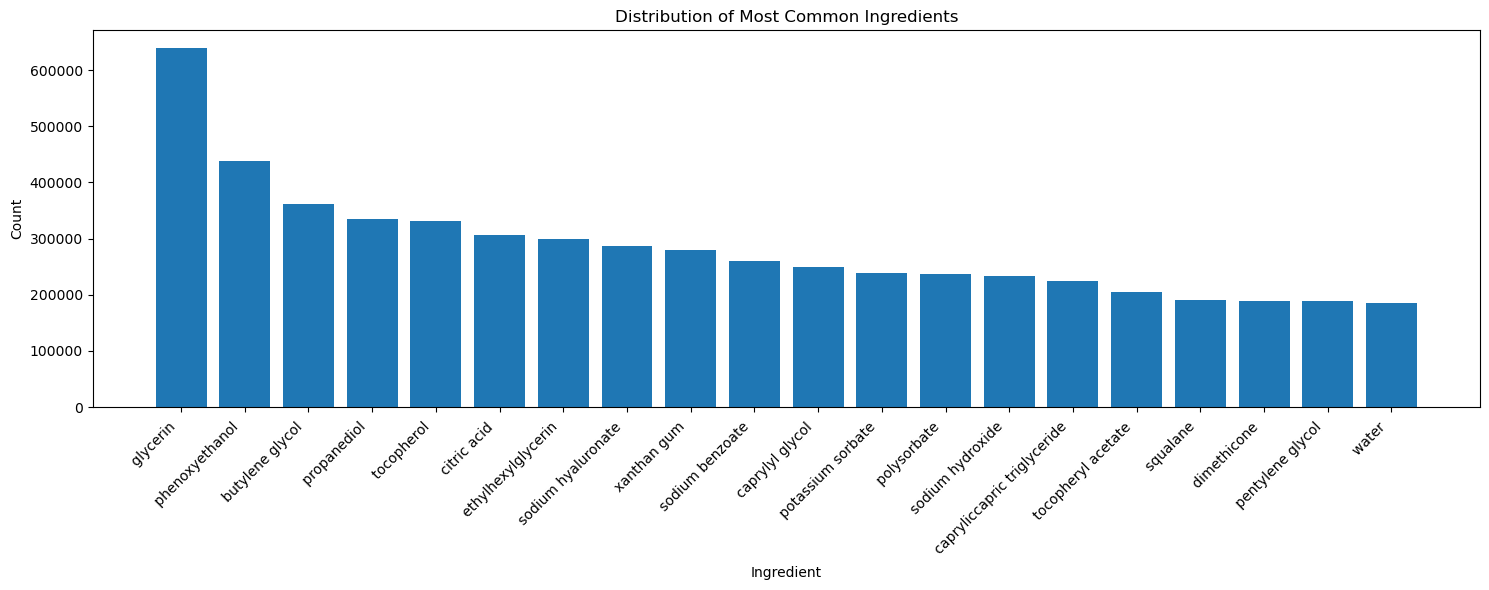

In [ ]:
# Creating a binary features for common ingredients

for ingredient in common_ingredients.keys():
    processed_data[f'has_{ingredient.replace(" ", "_")}'] = processed_data['processed_ingredients'].apply(
        lambda x: 1 if ingredient in x else 0
    )

# Visualizing the ingredient distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(common_ingredients.keys(), common_ingredients.values())
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Most Common Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [69]:
processed_data.columns

Index(['author_id', 'skin_type', 'rating', 'review_text',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd', 'product_name',
       'ingredients', 'highlights', 'primary_category', 'secondary_category',
       'processed_review', 'review_length', 'processed_ingredients',
       'ingredient_count', 'has__glycerin_', 'has__phenoxyethanol_',
       'has__butylene_glycol_', 'has__propanediol_', 'has__tocopherol_',
       'has__citric_acid_', 'has__ethylhexylglycerin_',
       'has__sodium_hyaluronate_', 'has__xanthan_gum_',
       'has__sodium_benzoate_', 'has__caprylyl_glycol_',
       'has__potassium_sorbate_', 'has__polysorbate_',
       'has__sodium_hydroxide_', 'has__capryliccapric_triglyceride_',
       'has__tocopheryl_acetate_', 'has__squalane_', 'has__dimethicone_',
       'has__pentylene_glycol_', 'has_water_'],
      dtype='object')

# **7) saving the data after preprocessing as csv file**

In [ ]:
# # Save the processed dataframe
# processed_data.to_csv('processed_data.csv', index=False)

In [71]:
recomend_data = pd.read_csv('processed_data.csv')
recomend_data.head(2)

C:\Users\saba2\AppData\Local\Temp\ipykernel_776\3087823563.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,author_id,skin_type,rating,review_text,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,product_id,price_usd,product_name,...,has__caprylyl_glycol_,has__potassium_sorbate_,has__polysorbate_,has__sodium_hydroxide_,has__capryliccapric_triglyceride_,has__tocopheryl_acetate_,has__squalane_,has__dimethicone_,has__pentylene_glycol_,has_water_
0,1741593524,dry,5,I use this with the Nudestix “Citrus Clean Bal...,2,0,2,P504322,19.0,Gentle Hydra-Gel Face Cleanser,...,0,0,0,0,0,0,0,0,0,1
1,5061282401,dry,5,My review title says it all! I get so excited ...,0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,...,0,0,0,0,0,0,0,0,0,1


-----------------------------------------------------------------------------------------------
# **8) Visualizations**

# Counting how many products are in the dataset

In [ ]:
# Counting the unique products
unique_products = recomend_data['product_id'].nunique()
print(f"Number of unique products: {unique_products}")

Number of unique products: 1703


# Plotting the distribution of the skin types

Skin Type Distribution:

Counts:
combination    478487
dry            163615
normal         115803
oily           105568
Name: skin_type, dtype: int64

Percentages:
combination    55.414240
dry            18.948479
normal         13.411305
oily           12.225976
Name: skin_type, dtype: float64 %


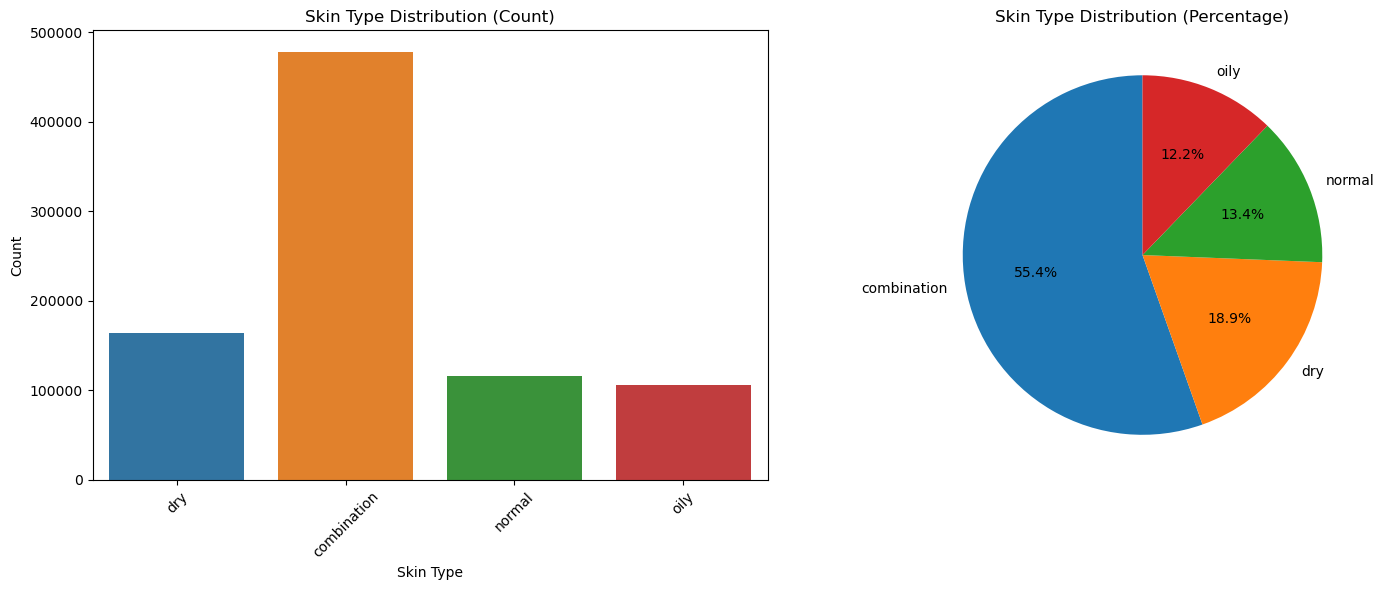

In [ ]:
# Geting the count of each skin type
skin_type_counts = recomend_data['skin_type'].value_counts()

# Printing the counts and percentages
print("Skin Type Distribution:")
print("\nCounts:")
print(skin_type_counts)
print("\nPercentages:")
print(skin_type_counts / len(recomend_data) * 100, "%")

# Creating a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
sns.countplot(data=recomend_data, x='skin_type', ax=ax1)
ax1.set_title('Skin Type Distribution (Count)')
ax1.set_xlabel('Skin Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(skin_type_counts.values, 
        labels=skin_type_counts.index, 
        autopct='%1.1f%%',
        startangle=90)
ax2.set_title('Skin Type Distribution (Percentage)')

plt.tight_layout()
plt.show()

### The distribution of the skin types is not balanced, but I don't think that this imbalance will affect the User-Based Collaborative Filtering so much because already each skin type of them has thousands of  reviews:

#### **Their Counts:** <li>combination ==> 478487</li><li>dry ========> 163615</li> <li>normal ======> 115803</li> <li>oily ========> 105568</li>

----------------------------------------------------------------------------------------
# **9) Label encoding**

In [87]:
recomend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863473 entries, 0 to 863472
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   author_id                          863473 non-null  object 
 1   skin_type                          863473 non-null  object 
 2   rating                             863473 non-null  int64  
 3   review_text                        863473 non-null  object 
 4   total_feedback_count               863473 non-null  int64  
 5   total_neg_feedback_count           863473 non-null  int64  
 6   total_pos_feedback_count           863473 non-null  int64  
 7   product_id                         863473 non-null  object 
 8   price_usd                          863473 non-null  float64
 9   product_name                       863473 non-null  object 
 10  ingredients                        863473 non-null  object 
 11  highlights                         8634

### **1) Onehot encoding for the skin types**

In [ ]:
# Creating a copy of the dataframe
encoded_data = recomend_data.copy()

# Initializing the OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # sparse=False to get a dense array instead of sparse matrix

# Reshaping the the skin_type column because OneHotEncoder expects 2D array
skin_type_encoded = encoder.fit_transform(encoded_data[['skin_type']])

# Creating a dataframe with the encoded values
skin_type_encoded_df = pd.DataFrame(
    skin_type_encoded, 
    columns=encoder.get_feature_names_out(['skin_type']),
    index=encoded_data.index
)

# Adding the encoded columns to the original dataframe
encoded_data = pd.concat([encoded_data, skin_type_encoded_df], axis=1)

# Verifying the encoding
encoded_data.head()

c:\Users\saba2\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,author_id,skin_type,rating,review_text,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,product_id,price_usd,product_name,...,has__capryliccapric_triglyceride_,has__tocopheryl_acetate_,has__squalane_,has__dimethicone_,has__pentylene_glycol_,has_water_,skin_type_combination,skin_type_dry,skin_type_normal,skin_type_oily
0,1741593524,dry,5,I use this with the Nudestix “Citrus Clean Bal...,2,0,2,P504322,19.0,Gentle Hydra-Gel Face Cleanser,...,0,0,0,0,0,1,0.0,1.0,0.0,0.0
1,5061282401,dry,5,My review title says it all! I get so excited ...,0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,...,0,0,0,0,0,1,0.0,1.0,0.0,0.0
2,6083038851,combination,5,I’ve always loved this formula for a long time...,0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,...,0,0,0,0,0,1,1.0,0.0,0.0,0.0
3,47056667835,combination,5,"If you have dry cracked lips, this is a must h...",0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,...,0,0,0,0,0,1,1.0,0.0,0.0,0.0
4,42802569154,normal,4,The scent isn’t my favourite but it works grea...,1,0,1,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,...,0,0,0,0,0,1,0.0,0.0,1.0,0.0


In [89]:
encoded_data.shape

(863473, 42)

In [90]:
encoded_data.columns

Index(['author_id', 'skin_type', 'rating', 'review_text',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd', 'product_name',
       'ingredients', 'highlights', 'primary_category', 'secondary_category',
       'processed_review', 'review_length', 'processed_ingredients',
       'ingredient_count', 'has__glycerin_', 'has__phenoxyethanol_',
       'has__butylene_glycol_', 'has__propanediol_', 'has__tocopherol_',
       'has__citric_acid_', 'has__ethylhexylglycerin_',
       'has__sodium_hyaluronate_', 'has__xanthan_gum_',
       'has__sodium_benzoate_', 'has__caprylyl_glycol_',
       'has__potassium_sorbate_', 'has__polysorbate_',
       'has__sodium_hydroxide_', 'has__capryliccapric_triglyceride_',
       'has__tocopheryl_acetate_', 'has__squalane_', 'has__dimethicone_',
       'has__pentylene_glycol_', 'has_water_', 'skin_type_combination',
       'skin_type_dry', 'skin_type_normal', 'skin_type_oily'],
      dtype='

In [91]:
encoded_data.drop(columns = "skin_type", inplace= True)
encoded_data.columns

Index(['author_id', 'rating', 'review_text', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'product_id',
       'price_usd', 'product_name', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'processed_review',
       'review_length', 'processed_ingredients', 'ingredient_count',
       'has__glycerin_', 'has__phenoxyethanol_', 'has__butylene_glycol_',
       'has__propanediol_', 'has__tocopherol_', 'has__citric_acid_',
       'has__ethylhexylglycerin_', 'has__sodium_hyaluronate_',
       'has__xanthan_gum_', 'has__sodium_benzoate_', 'has__caprylyl_glycol_',
       'has__potassium_sorbate_', 'has__polysorbate_',
       'has__sodium_hydroxide_', 'has__capryliccapric_triglyceride_',
       'has__tocopheryl_acetate_', 'has__squalane_', 'has__dimethicone_',
       'has__pentylene_glycol_', 'has_water_', 'skin_type_combination',
       'skin_type_dry', 'skin_type_normal', 'skin_type_oily'],
      dtype='object')

In [92]:
encoded_data.drop(columns = "author_id", inplace= True)
encoded_data.columns

Index(['rating', 'review_text', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'product_id',
       'price_usd', 'product_name', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'processed_review',
       'review_length', 'processed_ingredients', 'ingredient_count',
       'has__glycerin_', 'has__phenoxyethanol_', 'has__butylene_glycol_',
       'has__propanediol_', 'has__tocopherol_', 'has__citric_acid_',
       'has__ethylhexylglycerin_', 'has__sodium_hyaluronate_',
       'has__xanthan_gum_', 'has__sodium_benzoate_', 'has__caprylyl_glycol_',
       'has__potassium_sorbate_', 'has__polysorbate_',
       'has__sodium_hydroxide_', 'has__capryliccapric_triglyceride_',
       'has__tocopheryl_acetate_', 'has__squalane_', 'has__dimethicone_',
       'has__pentylene_glycol_', 'has_water_', 'skin_type_combination',
       'skin_type_dry', 'skin_type_normal', 'skin_type_oily'],
      dtype='object')

In [93]:
encoded_data.shape

(863473, 40)

In [94]:
encoded_data['secondary_category'].unique()

array(['Cleansers', 'Lip Balms & Treatments', 'Moisturizers',
       'Treatments', 'Mini Size', 'Masks', 'Sunscreen', 'Self Tanners',
       'Eye Care', 'Wellness'], dtype=object)

<font size = "20" color = "green">============================</font>

## But the 'Mini Size' category doesn't represent any product type, so I will need to handel it

# First lets take copy of the recomend_data to handle the mini size category

In [97]:
mini_test_df = encoded_data.copy()

In [98]:
mini_test_df.columns

Index(['rating', 'review_text', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'product_id',
       'price_usd', 'product_name', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'processed_review',
       'review_length', 'processed_ingredients', 'ingredient_count',
       'has__glycerin_', 'has__phenoxyethanol_', 'has__butylene_glycol_',
       'has__propanediol_', 'has__tocopherol_', 'has__citric_acid_',
       'has__ethylhexylglycerin_', 'has__sodium_hyaluronate_',
       'has__xanthan_gum_', 'has__sodium_benzoate_', 'has__caprylyl_glycol_',
       'has__potassium_sorbate_', 'has__polysorbate_',
       'has__sodium_hydroxide_', 'has__capryliccapric_triglyceride_',
       'has__tocopheryl_acetate_', 'has__squalane_', 'has__dimethicone_',
       'has__pentylene_glycol_', 'has_water_', 'skin_type_combination',
       'skin_type_dry', 'skin_type_normal', 'skin_type_oily'],
      dtype='object')

In [99]:
mini_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863473 entries, 0 to 863472
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   rating                             863473 non-null  int64  
 1   review_text                        863473 non-null  object 
 2   total_feedback_count               863473 non-null  int64  
 3   total_neg_feedback_count           863473 non-null  int64  
 4   total_pos_feedback_count           863473 non-null  int64  
 5   product_id                         863473 non-null  object 
 6   price_usd                          863473 non-null  float64
 7   product_name                       863473 non-null  object 
 8   ingredients                        863473 non-null  object 
 9   highlights                         863473 non-null  object 
 10  primary_category                   863473 non-null  object 
 11  secondary_category                 8634


### I can handle this by finding products labeled as "Mini Size" and checking if there are products with the same product_name but a different secondary_category. If a match is found, update the "Mini Size" category with the corresponding category.

In [ ]:
# Counting the  rows where secondary_category is 'Mini Size'
mini_size_count = len(mini_test_df[mini_test_df['secondary_category'] == 'Mini Size'])
print(f"Number of rows with 'Mini Size' category: {mini_size_count}")

# Calculating their percentage of the total rows
total_rows = len(mini_test_df)
percentage = (mini_size_count / total_rows) * 100
print(f"Percentage of 'Mini Size' rows: {percentage:.2f}%")

Number of rows with 'Mini Size' category: 77852
Percentage of 'Mini Size' rows: 9.02%


In [ ]:
# Creating a mapping of product names to their most common category (but I will exclude the Mini Size)
category_mapping = (
    mini_test_df[mini_test_df['secondary_category'] != 'Mini Size']
    .groupby('product_name')['secondary_category']
    .agg(lambda x: x.mode()[0] if not x.empty else None)
    .to_dict()
)

# Replacing the Mini Size categories with the corresponding ones
mini_size_mask = mini_test_df['secondary_category'] == 'Mini Size'
mini_test_df.loc[mini_size_mask, 'secondary_category'] = (
    mini_test_df.loc[mini_size_mask, 'product_name']
    .map(lambda x: category_mapping.get(x, 'Mini Size'))
)

# Checking the results
print("Updated category distribution:")
print(mini_test_df['secondary_category'].value_counts())

# Checking how many Mini Size items remain
remaining_mini = (mini_test_df['secondary_category'] == 'Mini Size').sum()
print(f"\nRemaining Mini Size items: {remaining_mini}")
print(f"Percentage of remaining Mini Size items: {(remaining_mini/len(mini_test_df))*100:.2f}%")

Updated category distribution:
Moisturizers              229173
Treatments                192003
Cleansers                 160834
Mini Size                  76726
Eye Care                   56315
Masks                      49645
Lip Balms & Treatments     46004
Sunscreen                  34835
Self Tanners               10820
Wellness                    7118
Name: secondary_category, dtype: int64

Remaining Mini Size items: 76726
Percentage of remaining Mini Size items: 8.89%


In [102]:
77852-76726

1126

<font size = "5"><b>Only <font color = "red">1126</font> products out of <font color = "red">77852</font> products are changed from mini size to another category (still there <font color = "red">76726</font> products with Mini Size category)</b></font> 

In [103]:
mini_test_df.columns

Index(['rating', 'review_text', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'product_id',
       'price_usd', 'product_name', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'processed_review',
       'review_length', 'processed_ingredients', 'ingredient_count',
       'has__glycerin_', 'has__phenoxyethanol_', 'has__butylene_glycol_',
       'has__propanediol_', 'has__tocopherol_', 'has__citric_acid_',
       'has__ethylhexylglycerin_', 'has__sodium_hyaluronate_',
       'has__xanthan_gum_', 'has__sodium_benzoate_', 'has__caprylyl_glycol_',
       'has__potassium_sorbate_', 'has__polysorbate_',
       'has__sodium_hydroxide_', 'has__capryliccapric_triglyceride_',
       'has__tocopheryl_acetate_', 'has__squalane_', 'has__dimethicone_',
       'has__pentylene_glycol_', 'has_water_', 'skin_type_combination',
       'skin_type_dry', 'skin_type_normal', 'skin_type_oily'],
      dtype='object')

In [104]:
mini_test_df["secondary_category"].unique()

array(['Cleansers', 'Lip Balms & Treatments', 'Moisturizers',
       'Treatments', 'Mini Size', 'Masks', 'Sunscreen', 'Self Tanners',
       'Eye Care', 'Wellness'], dtype=object)

In [105]:
encoded_data.columns

Index(['rating', 'review_text', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'product_id',
       'price_usd', 'product_name', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'processed_review',
       'review_length', 'processed_ingredients', 'ingredient_count',
       'has__glycerin_', 'has__phenoxyethanol_', 'has__butylene_glycol_',
       'has__propanediol_', 'has__tocopherol_', 'has__citric_acid_',
       'has__ethylhexylglycerin_', 'has__sodium_hyaluronate_',
       'has__xanthan_gum_', 'has__sodium_benzoate_', 'has__caprylyl_glycol_',
       'has__potassium_sorbate_', 'has__polysorbate_',
       'has__sodium_hydroxide_', 'has__capryliccapric_triglyceride_',
       'has__tocopheryl_acetate_', 'has__squalane_', 'has__dimethicone_',
       'has__pentylene_glycol_', 'has_water_', 'skin_type_combination',
       'skin_type_dry', 'skin_type_normal', 'skin_type_oily'],
      dtype='object')

# Now Lets take a Copy of the "encoded_data" data frame

In [106]:
final_df = encoded_data.copy()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863473 entries, 0 to 863472
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   rating                             863473 non-null  int64  
 1   review_text                        863473 non-null  object 
 2   total_feedback_count               863473 non-null  int64  
 3   total_neg_feedback_count           863473 non-null  int64  
 4   total_pos_feedback_count           863473 non-null  int64  
 5   product_id                         863473 non-null  object 
 6   price_usd                          863473 non-null  float64
 7   product_name                       863473 non-null  object 
 8   ingredients                        863473 non-null  object 
 9   highlights                         863473 non-null  object 
 10  primary_category                   863473 non-null  object 
 11  secondary_category                 8634

In [ ]:
# Droping the rows where 'secondary_category' is 'Mini Size'
final_df = final_df[final_df['secondary_category'] != 'Mini Size']

# Reseting the index after dropping rows
final_df.reset_index(drop=True, inplace=True)

# Printing the shape to see how many rows remain
print(f"Shape after dropping Mini Size rows: {final_df.shape}")

# Verifying the unique values in secondary_category to confirm Mini Size is gone
print("\nUnique values in secondary_category:")
print(final_df['secondary_category'].unique())

Shape after dropping Mini Size rows: (785621, 40)

Unique values in secondary_category:
['Cleansers' 'Lip Balms & Treatments' 'Moisturizers' 'Treatments' 'Masks'
 'Sunscreen' 'Self Tanners' 'Eye Care' 'Wellness']


In [108]:
final_df.shape

(785621, 40)

In [109]:
pd.set_option("display.max_columns", None)

In [110]:
final_df.head(2)

,rating,review_text,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,product_id,price_usd,product_name,ingredients,highlights,primary_category,secondary_category,processed_review,review_length,processed_ingredients,ingredient_count,has__glycerin_,has__phenoxyethanol_,has__butylene_glycol_,has__propanediol_,has__tocopherol_,has__citric_acid_,has__ethylhexylglycerin_,has__sodium_hyaluronate_,has__xanthan_gum_,has__sodium_benzoate_,has__caprylyl_glycol_,has__potassium_sorbate_,has__polysorbate_,has__sodium_hydroxide_,has__capryliccapric_triglyceride_,has__tocopheryl_acetate_,has__squalane_,has__dimethicone_,has__pentylene_glycol_,has_water_,skin_type_combination,skin_type_dry,skin_type_normal,skin_type_oily
0,5,I use this with the Nudestix “Citrus Clean Bal...,2,0,2,P504322,19.0,Gentle Hydra-Gel Face Cleanser,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",['Clean at Sephora'],Skincare,Cleansers,use nudestix citrus clean balm makeup melt dou...,283,water | dipropylene glycol | peg capryliccapri...,22,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0
1,5,My review title says it all! I get so excited ...,0,0,0,P420652,24.0,Lip Sleeping Mask Intense Hydration with Vitam...,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,review title say get excited get bed apply lip...,178,diisostearyl malate | hydrogenated polyisobute...,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0
